In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete[1].csv to covid_19_clean_complete[1].csv


In [ ]:
#once uploaded you can read the file using appropriate libraries:

#for csv files:
import pandas as pd
df = pd.read_csv('covid_19_clean_complete[1].csv')
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
import pandas as pd  # Load the dataset

# Load the dataset (replace with the correct path if needed)
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Print the original column names to identify any discrepancies
print("Original column names:", df.columns)

# Rename columns for clarity (ensure column names are consistent)
df.rename(columns={
    "Country/Region": "Country",
    "Confirmed Deaths": "Deaths",
    "Recovered Active": "Active_Cases",
    "New cases": "New_Cases",
    "New deaths": "New_Deaths",
    "WHO Region": "WHO_Region"
}, inplace=True)

# Print the column names after renaming to confirm the changes
print("Renamed column names:", df.columns)

# Ensure numeric columns are properly formatted, checking for errors
numeric_columns = ["Confirmed", "Deaths", "Recovered", "Active_Cases", "New_Cases", "New_Deaths"]

# Check if the columns exist in the dataset
missing_columns = [col for col in numeric_columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing: {missing_columns}")

# Only apply pd.to_numeric to existing columns to avoid KeyError
existing_columns = [col for col in numeric_columns if col in df.columns]
df[existing_columns] = df[existing_columns].apply(pd.to_numeric, errors='coerce')

# Add calculated columns for mortality and recovery rates
df["Mortality_Rate"] = (df["Deaths"] / df["Confirmed"]) * 100
df["Recovery_Rate"] = (df["Recovered"] / df["Confirmed"]) * 100

# Drop unnecessary columns (make sure the column names are correct)
df.drop(columns=["1 Confirmed 1 week ch", "1 Recovered Deaths / 1"], errors='ignore', inplace=True)

# Sort data by confirmed cases in descending order
df.sort_values(by="Confirmed", ascending=False, inplace=True)

# Export cleaned dataset
df.to_csv("cleaned_covid19_dataset.csv", index=False)

# Output message
print("Dataset cleaned and saved as 'cleaned_covid19_dataset.csv'")

# Display the first few rows of the cleaned data
print(df.head())

Original column names: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')
Renamed column names: Index(['Province/State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO_Region'],
      dtype='object')
Dataset cleaned and saved as 'cleaned_covid19_dataset.csv'
      Province/State Country   Lat   Long        Date  Confirmed  Deaths  \
49030            NaN      US  40.0 -100.0  2020-07-27    4290259  148011   
48769            NaN      US  40.0 -100.0  2020-07-26    4233923  146935   
48508            NaN      US  40.0 -100.0  2020-07-25    4178970  146465   
48247            NaN      US  40.0 -100.0  2020-07-24    4112531  145560   
47986            NaN      US  40.0 -100.0  2020-07-23    4038816  144430   

       Recovered   Active WHO_Region  Mortality_Rate  Recovery_Rate  
49030    1325804  2816444   Americas        3.449932      30.902

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving covid_19_clean_complete[1].csv to covid_19_clean_complete[1] (1).csv


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Display the first few rows
print(df.head())

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


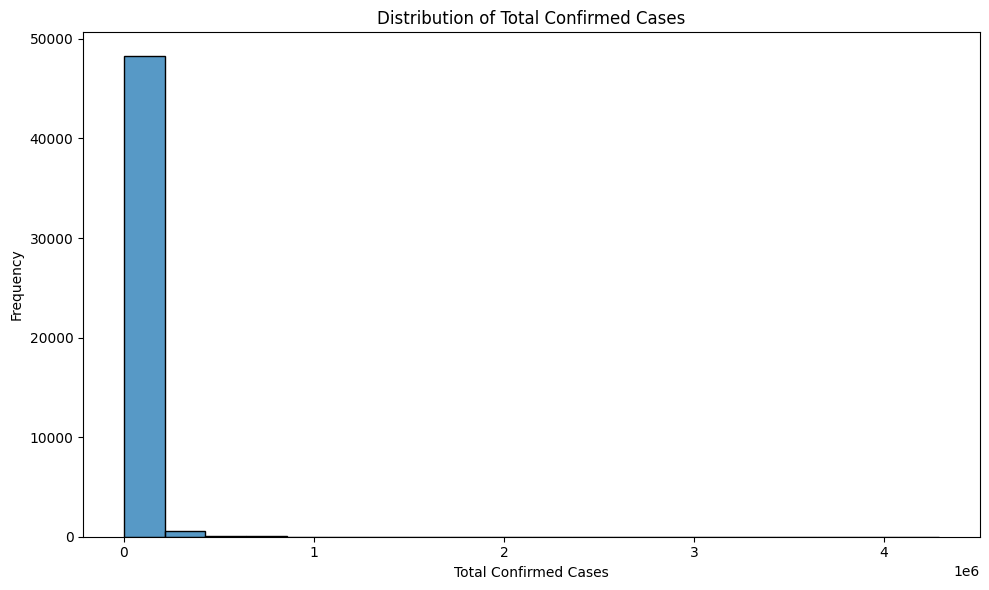

In [ ]:
#histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the histogram for 'Confirmed' cases
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Confirmed'], bins=20, kde=False)  # Adjust bins as needed
plt.title('Distribution of Total Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

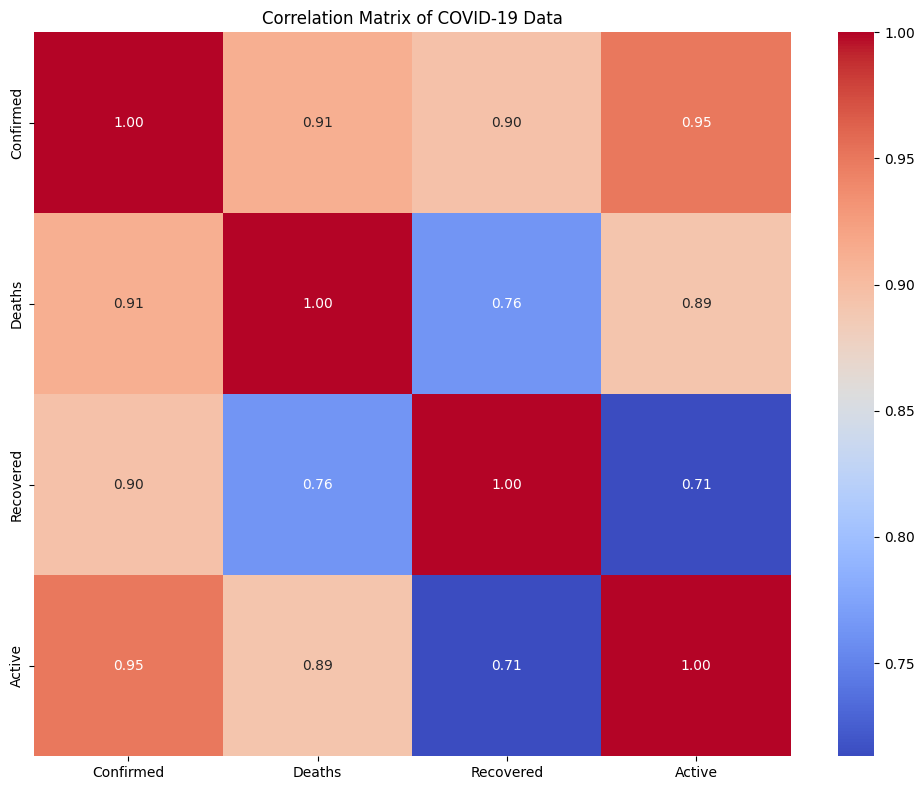

In [ ]:
#heat map
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Select numeric columns for correlation analysis
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
correlation_data = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Data')
plt.tight_layout()
plt.show()

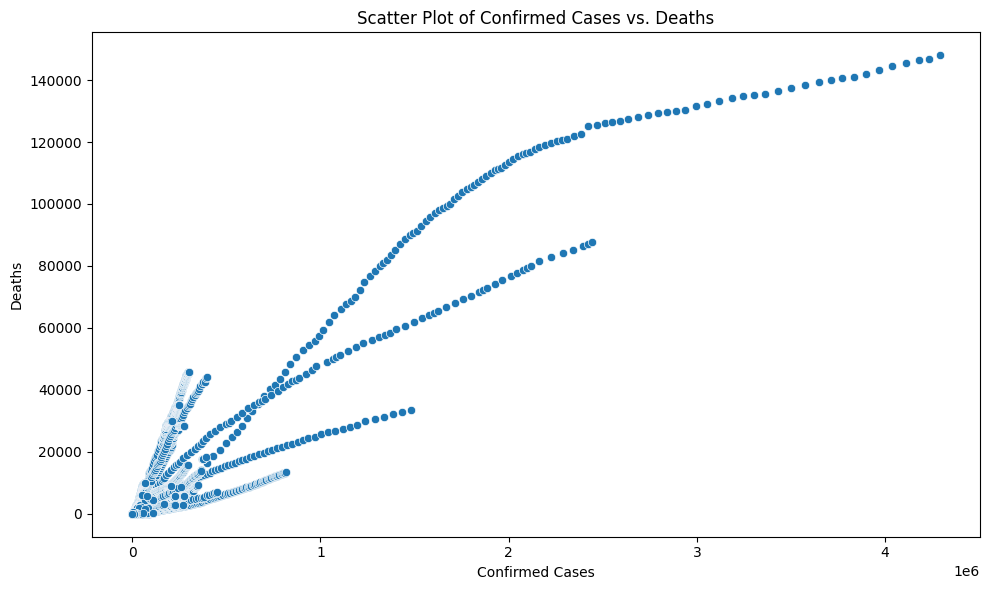

In [ ]:
#scatter plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Scatter Plot of Confirmed Cases vs. Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

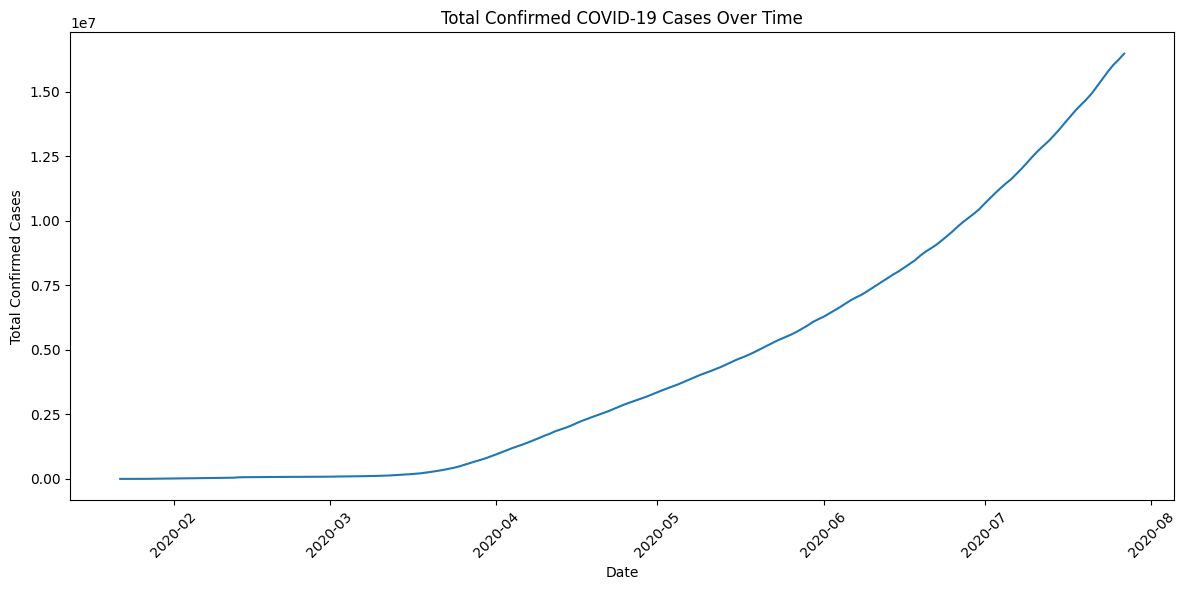

In [ ]:
#line plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group data by date and sum confirmed cases
daily_cases = df.groupby('Date')['Confirmed'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.lineplot(x='Date', y='Confirmed', data=daily_cases)
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

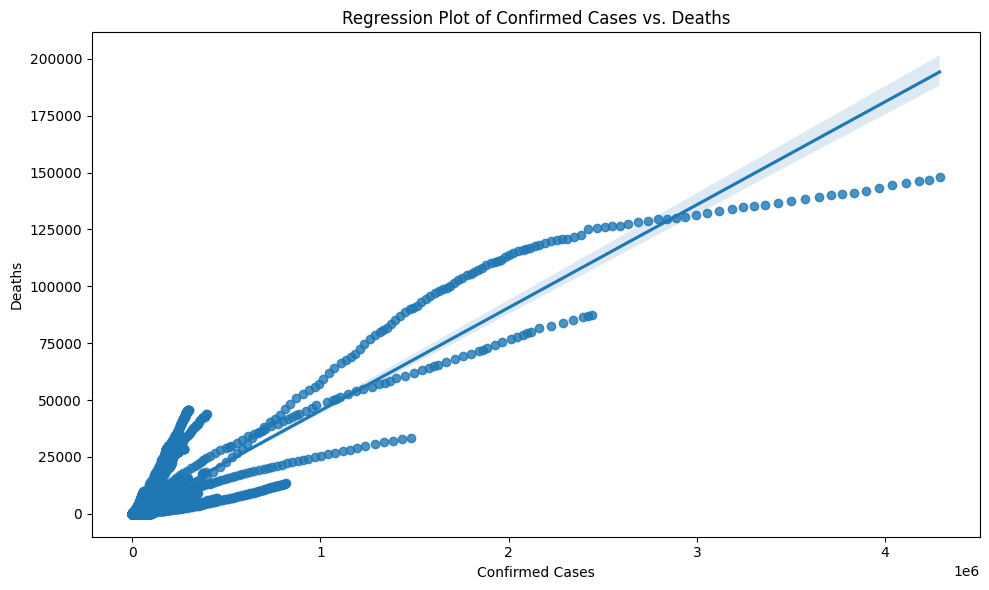

In [ ]:
#regression plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the regression plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.regplot(x='Confirmed', y='Deaths', data=df)
plt.title('Regression Plot of Confirmed Cases vs. Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

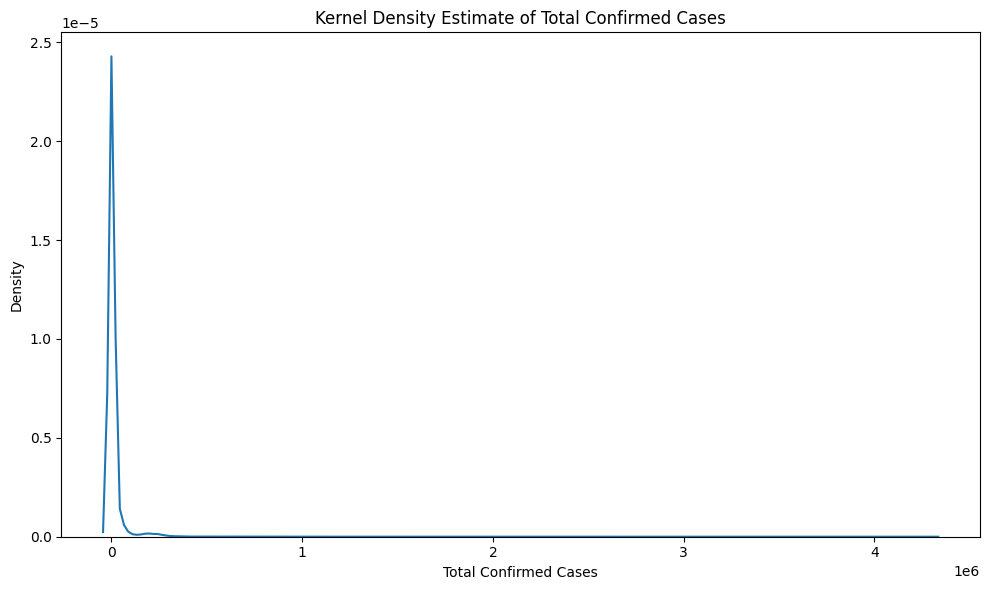

In [ ]:
#KDE plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the KDE plot for 'Confirmed' cases
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.kdeplot(df['Confirmed'])  # Use 'Confirmed' column for KDE
plt.title('Kernel Density Estimate of Total Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

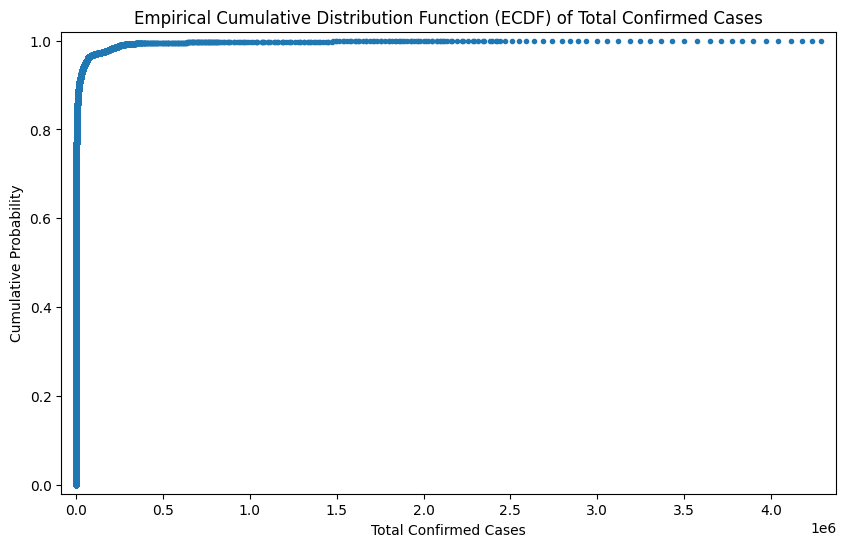

In [ ]:
#ECDF plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the ECDF plot for 'Confirmed' cases
x = np.sort(df['Confirmed'])
y = np.arange(1, len(x) + 1) / len(x)

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical Cumulative Distribution Function (ECDF) of Total Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Cumulative Probability')
plt.margins(0.02)  # Add a small

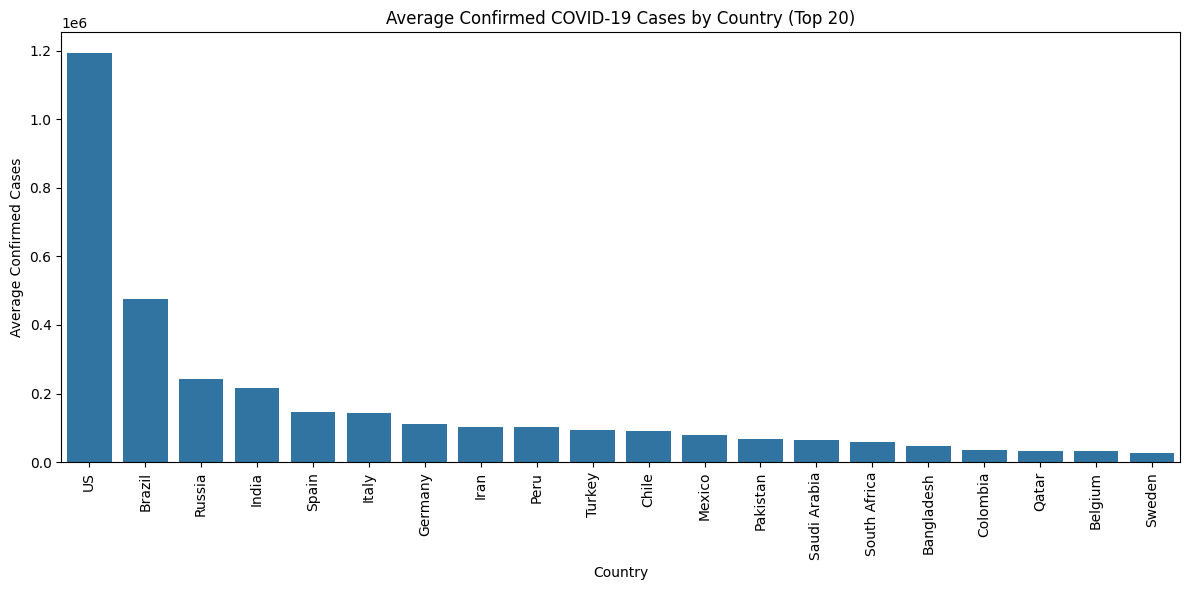

In [ ]:
#bar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Group data by country and calculate average confirmed cases
country_cases = df.groupby('Country/Region')['Confirmed'].mean().reset_index()

# Sort by average confirmed cases in descending order (optional)
country_cases = country_cases.sort_values(by='Confirmed', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Country/Region', y='Confirmed', data=country_cases.head(20))  # Show top 20 countries
plt.title('Average Confirmed COVID-19 Cases by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Average Confirmed Cases')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

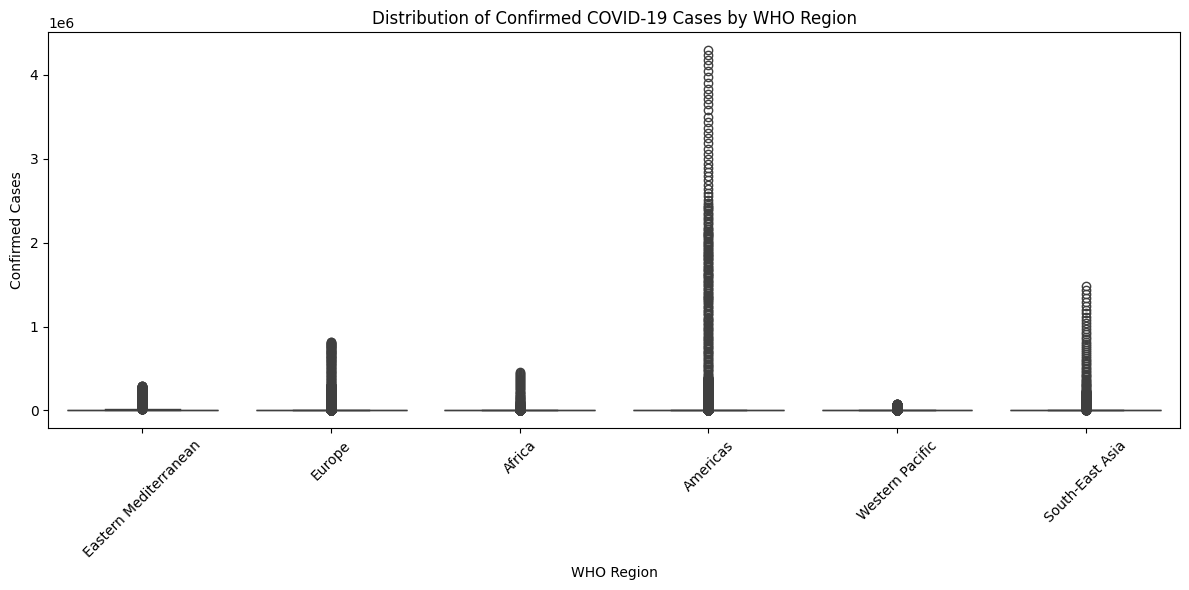

In [ ]:
#box
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the box plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

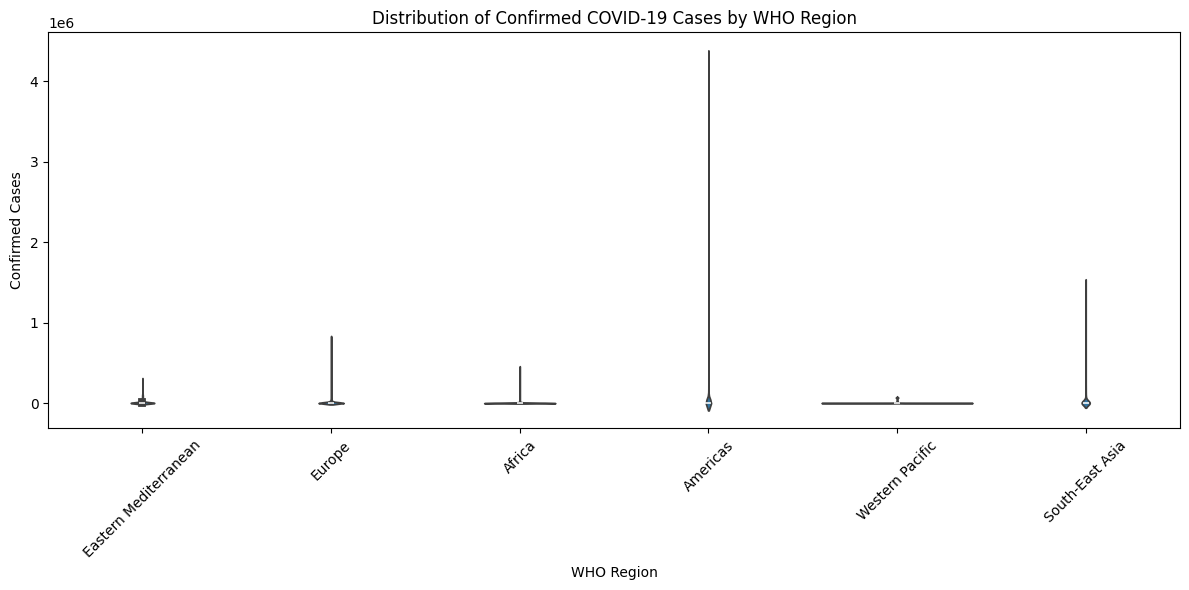

In [ ]:
#violin plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.violinplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

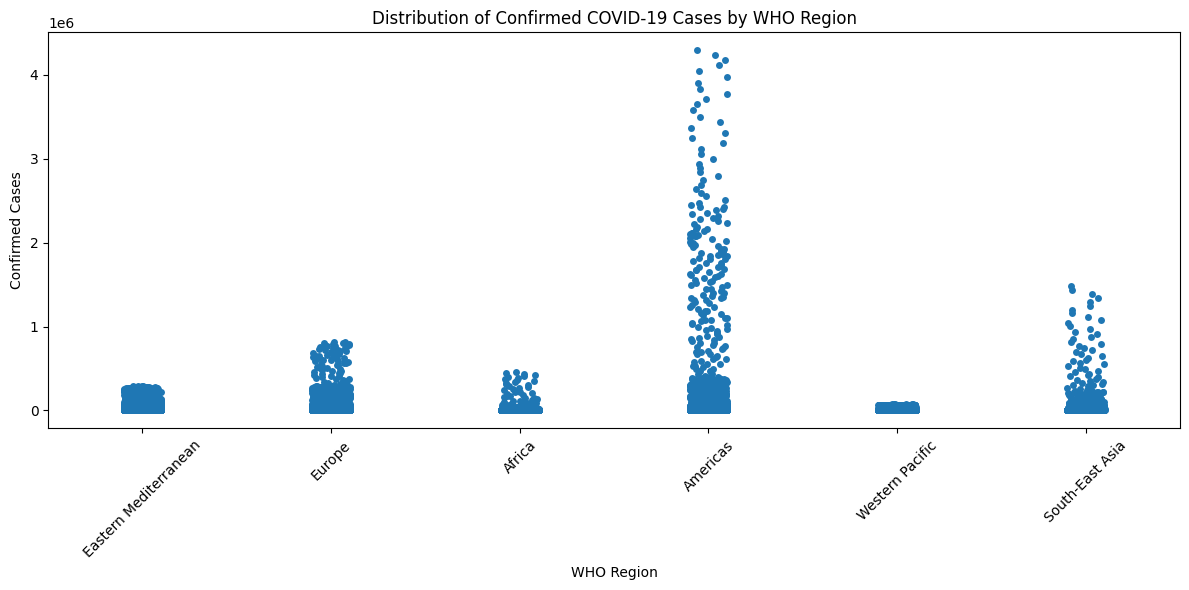

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the strip plot
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.stripplot(x='WHO Region', y='Confirmed', data=df)
plt.title('Distribution of Confirmed COVID-19 Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

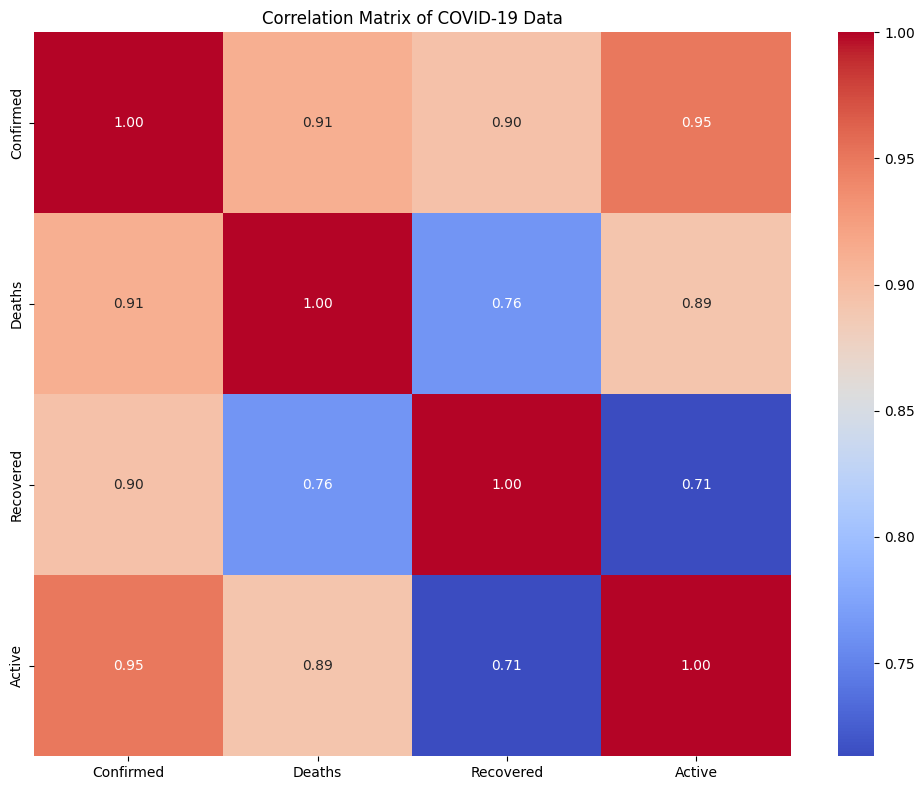

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Select numeric columns for correlation analysis
numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active']
correlation_data = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of COVID-19 Data')
plt.tight_layout()
plt.show()

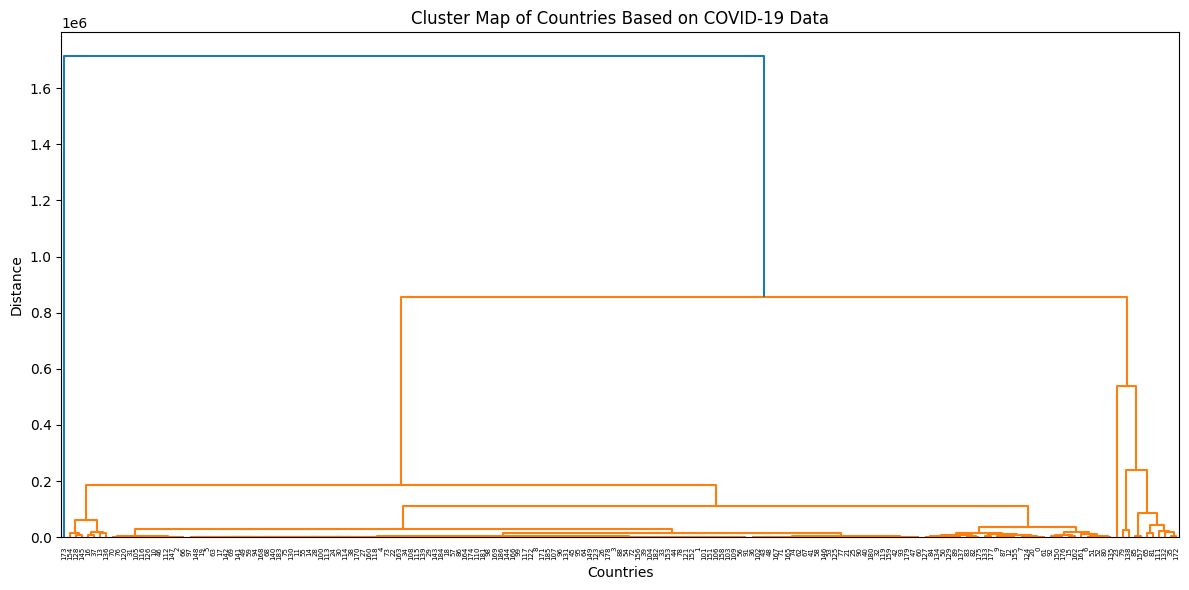

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Select relevant columns and group by country
cluster_data = df.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].mean()

# Create the dendrogram
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
dendrogram = sch.dendrogram(sch.linkage(cluster_data, method='ward'))
plt.title('Cluster Map of Countries Based on COVID-19 Data')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

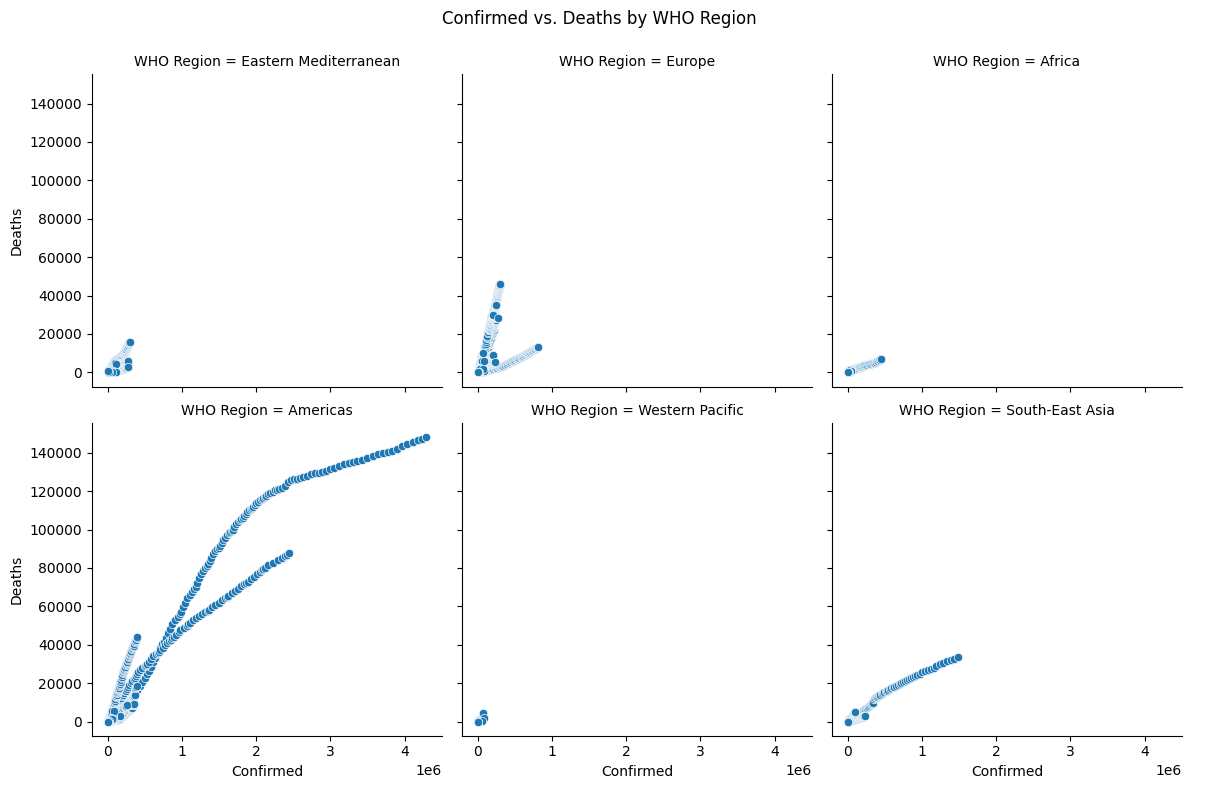

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_19_clean_complete[1].csv")

# Create the facet grid
g = sns.FacetGrid(df, col='WHO Region', col_wrap=3, height=4)  # Adjust col_wrap and height as needed
g.map(sns.scatterplot, 'Confirmed', 'Deaths')
g.add_legend()  # Add a legend if needed
plt.subplots_adjust(top=0.9)  # Adjust subplot spacing if needed
g.fig.suptitle('Confirmed vs. Deaths by WHO Region')  # Add a main title
plt.show()

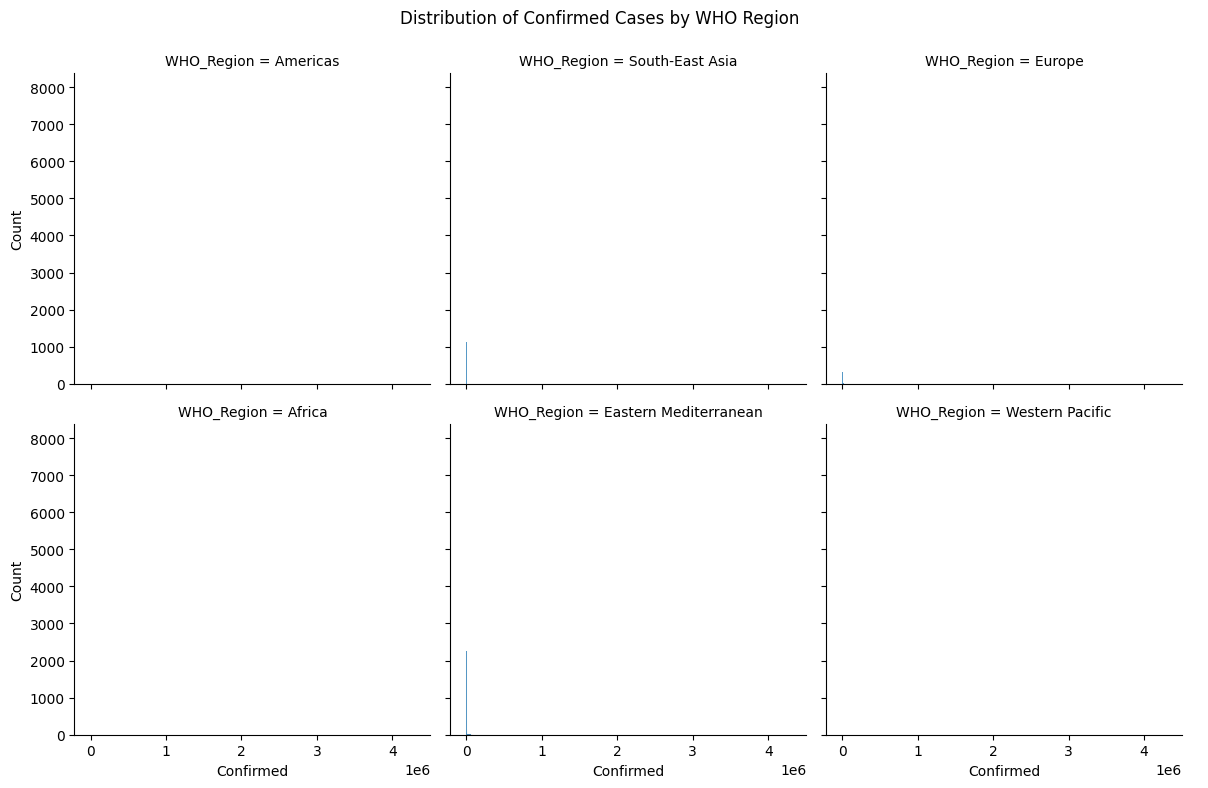

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_csv("cleaned_covid19_dataset.csv")

# Create the facet grid
g = sns.FacetGrid(df, col='WHO_Region', col_wrap=3, height=4)  # 'WHO_Region' for columns
g.map(sns.histplot, 'Confirmed')  # Use histplot for distribution
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Confirmed Cases by WHO Region')
plt.show()